In [24]:
# library use
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime
from datetime import timedelta
import datetime as dt
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pickle
%config InlineBackend.figure_format = 'retina'
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [25]:
df = pd.read_csv('bloomberg_krx_hynix_191229_2.csv')

In [26]:
df.drop('Unnamed: 0', axis = 1, inplace =True)

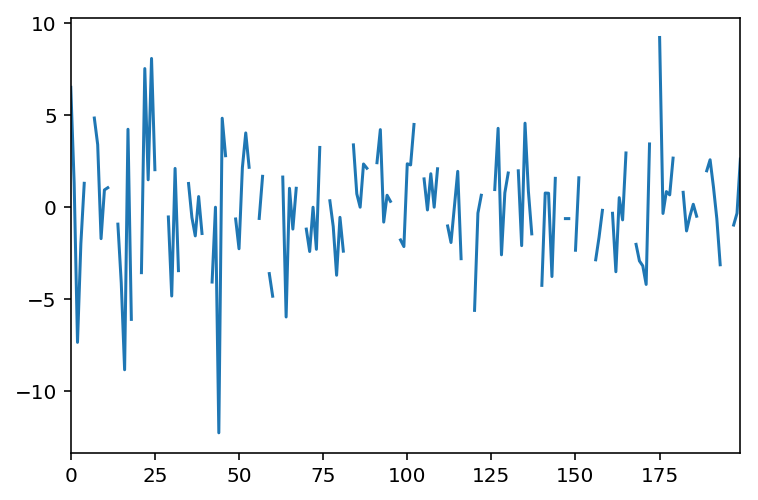

In [27]:
df['hynix_change'][0:200].plot()

# 1 Step

In [59]:
# 결측치 채우기
# step은 ffill > bfill
df.fillna(method = 'ffill', inplace = True)
df.fillna(method = 'bfill', inplace = True)

In [60]:
df.isna().sum().sum()

0

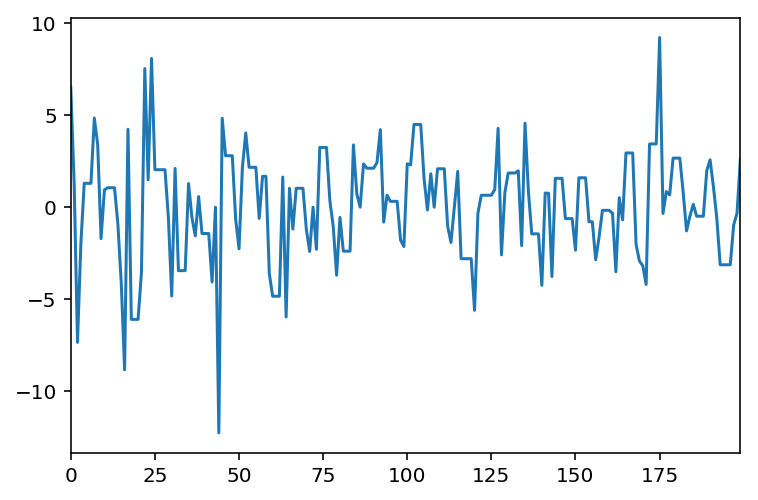

In [61]:
df['hynix_change'][0:200].plot()

# 2 Linear

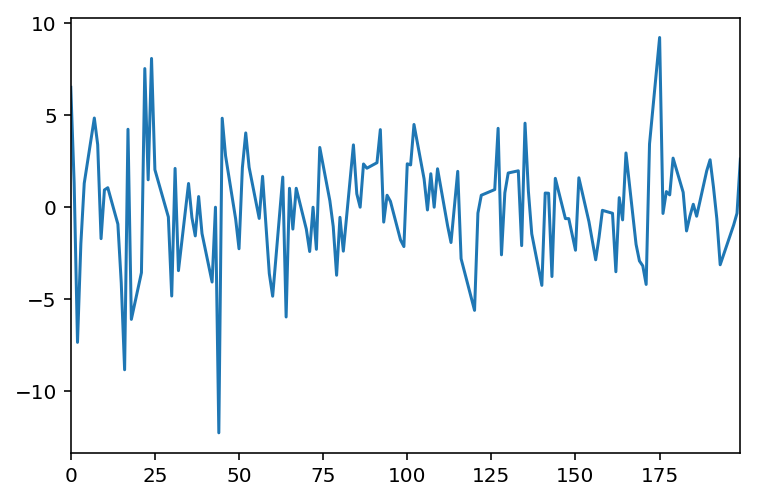

In [11]:
df['hynix_change'].interpolate()[0:200].plot()

In [ ]:
df = df.interpolate()
# 못채우는 사잇값을 채우기 위해서는 bfill로 
df = df.fillna(method = 'bfill')

In [ ]:
df.isna().sum().sum()

# 3 Spline

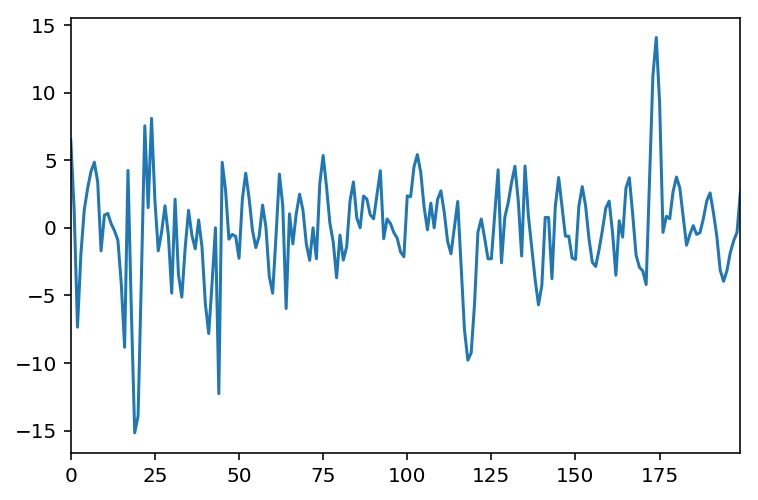

In [28]:
df['hynix_change'].interpolate(method = 'cubic', limit_area = 'inside')[0:200].plot()

In [29]:
df = df.interpolate(method = 'cubic', limit_area = 'inside')
df = df.fillna(method = 'bfill')
df = df.fillna(method = 'ffill')

In [30]:
df.isna().sum().sum()

0

# Scaling

In [31]:
date = df.date

In [32]:
df.drop('date', axis = True, inplace = True)

In [33]:
# hynix, krx
df.drop('hynix_change', axis = 1, inplace = True)

In [34]:
# scaling 하기전에 columns 뽑기 
col_name = df.columns

In [35]:
# scaling과 동시에 변환
df = StandardScaler().fit_transform(df)
#df = MinMaxScaler().fit_transfrom(df)

In [36]:
df = pd.DataFrame(df, columns = col_name)

In [37]:
df.head()

,KRX_change,FDTRIndex,USGG3MIndex,USGG10YRIndex,USTW$Index,INJCJCIndex,INJCSPIndex,USEMNCHGIndex,NFPPCHIndex,NFPTCHIndex,...,USCABALIndex,JNVNIYOYIndex,COSTNFR%Index,KOGNICNYIndex,KODFTOTYIndex,KOGNICUYIndex,EHCAUSIndex,KOGCGDPYIndex,PRODNFR%Index,KOGCSTOQIndex
0,0.157063,1.703416,1.793907,1.545836,0.587399,-0.139676,0.774444,0.086995,0.06318,0.008021,...,-2.097341,1.310912,0.87787,-0.168127,-1.791813,-0.042693,-2.041472,0.183274,0.64039,-0.600704
1,0.157063,1.703416,1.819072,1.517702,0.469118,-0.139676,0.774444,0.086995,0.06318,0.008021,...,-2.097341,1.310912,0.87787,-0.168127,-1.791813,-0.042693,-2.041472,0.183274,0.64039,-0.600704
2,0.157063,1.703416,1.859409,1.495627,0.401123,-0.139676,0.774444,0.086995,0.06318,0.008021,...,-2.097341,1.310912,0.87787,-0.168127,-1.791813,-0.042693,-2.041472,0.183274,0.64039,-0.600704
3,0.157063,1.703416,1.859101,1.505587,0.421556,-0.139676,0.774444,0.086995,0.06318,0.008021,...,-2.097341,1.310912,0.87787,-0.168127,-1.791813,-0.042693,-2.041472,0.183274,0.64039,-0.600704
4,0.157063,1.703416,1.870943,1.527559,0.378234,-0.139676,0.774444,0.086995,0.06318,0.008021,...,-2.097341,1.310912,0.87787,-0.168127,-1.791813,-0.042693,-2.041472,0.183274,0.64039,-0.600704


In [15]:
# Hynix
#y_target = df['hynix_change']
#X_data = df.drop('hynix_change', axis = 1, inplace = False)

In [38]:
# KRX
y_target = df['KRX_change']
X_data = df.drop('KRX_change', axis = 1, inplace = False)

In [46]:
# random split과 not random split
#X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, shuffle = False)

# Linear Model

In [47]:
lr = LinearRegression()
ridge = Ridge(alpha = 100)
lasso = Lasso(alpha = 100)

In [48]:
def get_linear_model_r2score(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("model name :", model.__class__.__name__)
    print('MSE: {0: .3f}, RMSE : {1:.3F}'.format(mse, rmse))
    print('Variance Score : {0:3f}'.format(r2_score(y_test, y_pred)))

In [49]:
# 트리 기반 회귀 모델을 반복하며 평가 수행
linear_models = [lr, ridge, lasso]
for model in linear_models:
    get_linear_model_r2score(model, X_train, y_train, X_test, y_test)

model name : LinearRegression
MSE:  86434.426, RMSE : 293.997
Variance Score : -105644.490978
model name : Ridge
MSE:  1.188, RMSE : 1.090
Variance Score : -0.452575
model name : Lasso
MSE:  0.818, RMSE : 0.905
Variance Score : -0.000174


# Tree Model

In [50]:
dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = 4)
rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 1000)
gb_reg = GradientBoostingRegressor(random_state = 0, n_estimators = 1000)
xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators = 1000)

In [51]:
def get_tree_model_r2score(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("model name :", model.__class__.__name__)
    print('MSE: {0: .3f}, RMSE : {1:.3F}'.format(mse, rmse))
    print('Variance Score : {0:3f}'.format(r2_score(y_test, y_pred)))

In [52]:
# 트리 기반 회귀 모델을 반복하며 평가 수행
tree_models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in tree_models:
    get_tree_model_r2score(model, X_train, y_train, X_test, y_test)

model name : DecisionTreeRegressor
MSE:  0.818, RMSE : 0.905
Variance Score : -0.000113
model name : RandomForestRegressor
MSE:  4.810, RMSE : 2.193
Variance Score : -4.878819
model name : GradientBoostingRegressor
MSE:  5.729, RMSE : 2.393
Variance Score : -6.001950
[22:54:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model name : XGBRegressor
MSE:  1.999, RMSE : 1.414
Variance Score : -1.442865
model name : LGBMRegressor
MSE:  0.960, RMSE : 0.980
Variance Score : -0.173830
